In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# raw_dataset = pd.read_csv("/data/fast0/datasets/glathida-3.1.0/data/T.csv")

T_dataset = pd.read_csv("~/data/glac/T.csv")
TT_dataset = pd.read_csv("~/data/glac/TT.csv")
TTT_dataset = pd.read_csv("~/data/glac/TTT.csv")

T_dataset = T_dataset.drop("GLACIER_DB", axis=1)
T_dataset = T_dataset.drop("POLITICAL_UNIT", axis=1)
T_dataset = T_dataset.drop("GLACIER_ID", axis=1)
T_dataset = T_dataset.drop("GLACIER_NAME", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_POINTS", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("TOTAL_LENGTH_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("INTERPOLATION_METHOD", axis=1)
T_dataset = T_dataset.drop("INVESTIGATOR", axis=1)
T_dataset = T_dataset.drop("SPONSORING_AGENCY", axis=1)
T_dataset = T_dataset.drop("ELEVATION_DATE", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD_DETAILS", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD", axis=1)
T_dataset = T_dataset.drop("SURVEY_DATE", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS", axis=1)
T_dataset = T_dataset.drop("AREA", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("MAXIMUM_THICKNESS", axis=1)
T_dataset = T_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("DATA_FLAG", axis=1)
T_dataset = T_dataset.drop("REMARKS", axis=1)
T_dataset = T_dataset.drop("REFERENCES", axis=1)
T_dataset = T_dataset.drop("MEAN_SLOPE", axis=1)

TT_dataset = TT_dataset.drop("POLITICAL_UNIT", axis=1)
TT_dataset = TT_dataset.drop("GLACIER_NAME", axis=1)
TT_dataset = TT_dataset.drop("SURVEY_DATE", axis=1)
TT_dataset = TT_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("MAXIMUM_THICKNESS", axis=1)
TT_dataset = TT_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("DATA_FLAG", axis=1)
TT_dataset = TT_dataset.drop("REMARKS", axis=1)

TTT_dataset = TTT_dataset.drop("POLITICAL_UNIT", axis=1)
TTT_dataset = TTT_dataset.drop("GLACIER_NAME", axis=1)
TTT_dataset = TTT_dataset.drop("SURVEY_DATE", axis=1)
TTT_dataset = TTT_dataset.drop("PROFILE_ID", axis=1)
TTT_dataset = TTT_dataset.drop("THICKNESS_UNCERTAINTY", axis=1)
TTT_dataset = TTT_dataset.drop("DATA_FLAG", axis=1)
TTT_dataset = TTT_dataset.drop("REMARKS", axis=1)
TTT_dataset = TTT_dataset.drop("POINT_ID", axis=1)

TT_plu = pd.merge(TT_dataset, T_dataset, on=["GlaThiDa_ID"])

TTT_plu = pd.merge(TT_plu,TTT_dataset, on=["GlaThiDa_ID"])

TTT_plus = TTT_plu[np.logical_and(TTT_plu["ELEVATION"] > TTT_plu["LOWER_BOUND"], TTT_plu["ELEVATION"] < TTT_plu["UPPER_BOUND"])]

TTT_plus

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,4,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GlaThiDa_ID,LOWER_BOUND,UPPER_BOUND,AREA,MEAN_SLOPE,MEAN_THICKNESS,LAT,LON,POINT_LAT,POINT_LON,ELEVATION,THICKNESS
0,362,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960842,9.390133,2624.0,15
1,362,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960844,9.390126,2625.0,15
2,362,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960847,9.390118,2625.0,15
3,362,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960849,9.390111,2625.0,14
4,362,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960851,9.390103,2624.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
174731,2124,5600,5800,0.51264,NaN,23,-3.0560,37.3530,-3.060080,37.347200,5750.0,27
174732,2124,5600,5800,0.51264,NaN,23,-3.0560,37.3530,-3.060080,37.347700,5750.0,20
174733,2124,5600,5800,0.51264,NaN,23,-3.0560,37.3530,-3.060080,37.348100,5750.0,23
174734,2124,5600,5800,0.51264,NaN,23,-3.0560,37.3530,-3.060080,37.348600,5750.0,22


In [2]:
TTT_plus.dropna()
TTT_plus.isna().sum()

GlaThiDa_ID         0
LOWER_BOUND         0
UPPER_BOUND         0
AREA              409
MEAN_SLOPE        939
MEAN_THICKNESS      0
LAT                 0
LON                 0
POINT_LAT           0
POINT_LON           0
ELEVATION           0
THICKNESS           0
dtype: int64

In [3]:
#split the dataset and reserve some to test what was trained.
train_dataset = TTT_plus.sample(frac=0.8, random_state=0)
test_dataset = TTT_plus.drop(train_dataset.index)

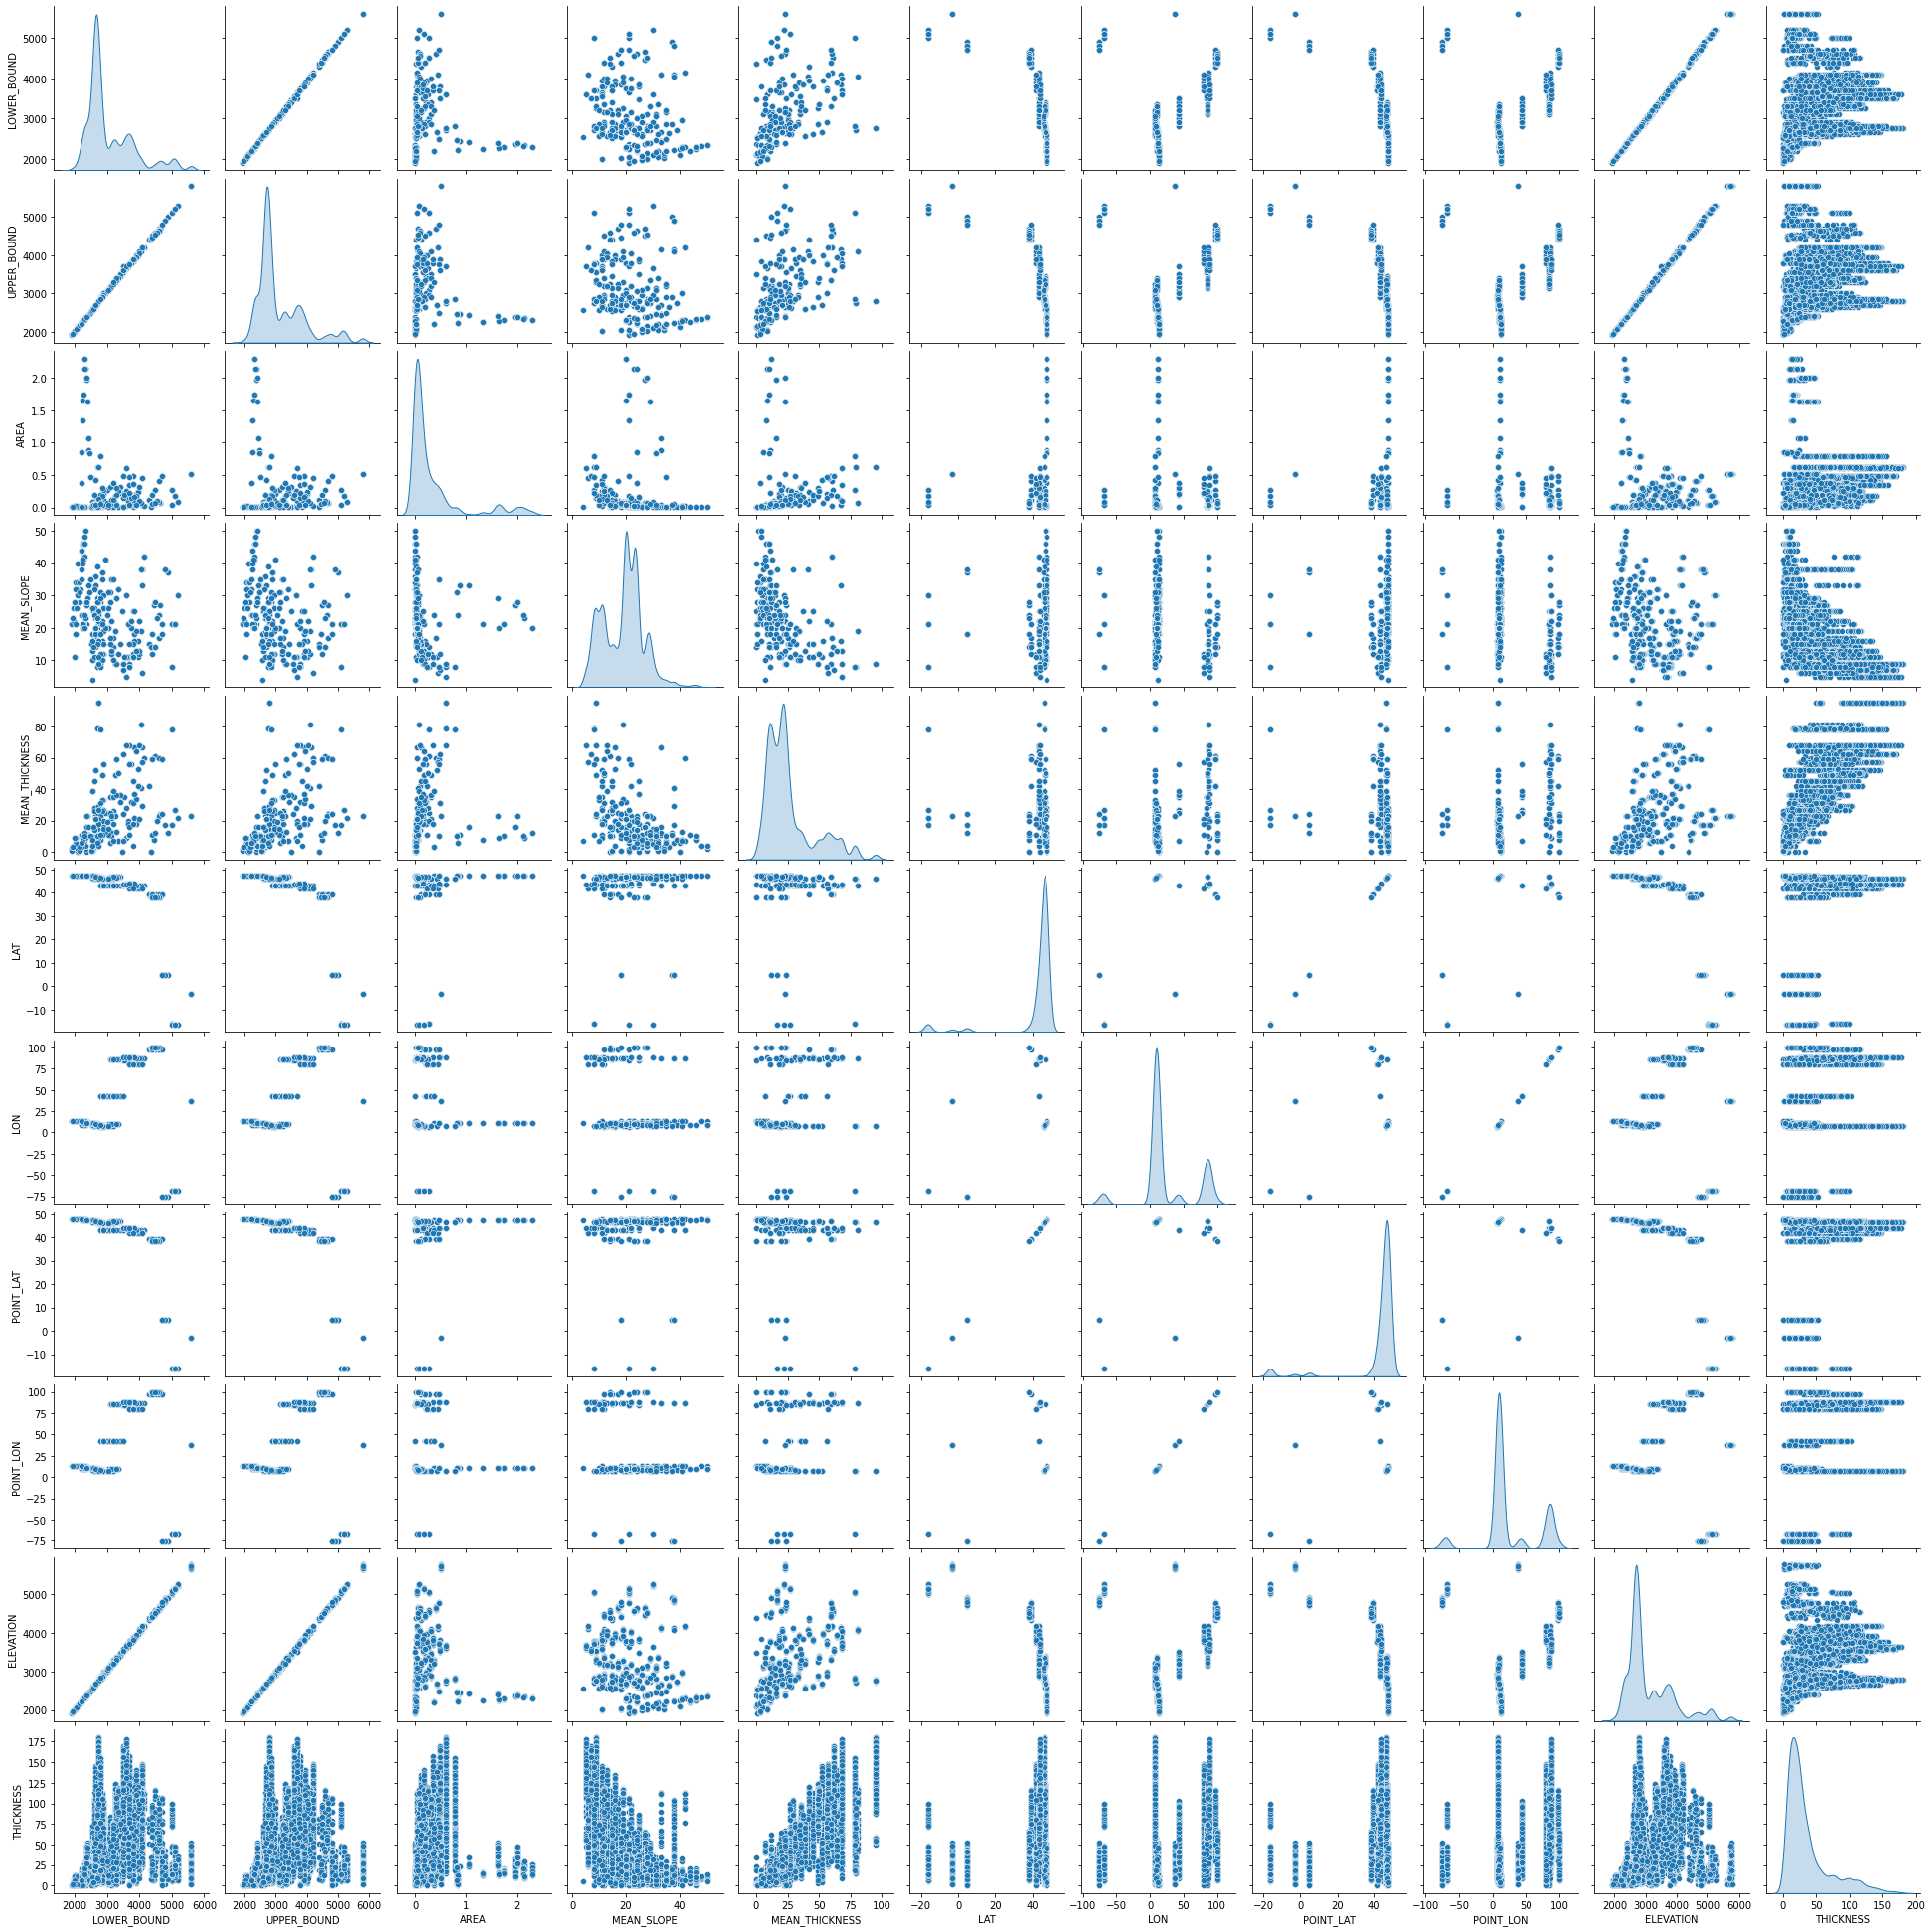

In [4]:
sns.pairplot(train_dataset[["LOWER_BOUND", "UPPER_BOUND", "AREA", "MEAN_SLOPE","MEAN_THICKNESS","LAT","LON","POINT_LAT","POINT_LON","ELEVATION","THICKNESS"]], diag_kind='kde')

In [5]:
#separate out features - what will be trained to predict desired attribute
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#define label - attribute training to be picked
train_labels = train_features.pop("THICKNESS")
test_labels = test_features.pop("THICKNESS")

train_features.describe().transpose()[['mean', 'std']]

,mean,std
GlaThiDa_ID,1293.834205,826.788081
LOWER_BOUND,3066.915540,736.781374
UPPER_BOUND,3122.239857,758.678595
AREA,0.343401,0.558599
MEAN_SLOPE,19.039625,7.455841
MEAN_THICKNESS,26.119163,19.336895
LAT,42.449200,13.596675
LON,24.579854,39.366680
POINT_LAT,42.448247,13.596510
POINT_LON,24.580141,39.366154


In [6]:
#establish normalization layers
normalizer = {}
variable_list = ("LOWER_BOUND", "UPPER_BOUND", "AREA", "MEAN_SLOPE","MEAN_THICKNESS","LAT","LON","POINT_LAT","POINT_LON","ELEVATION")
for variable_name in variable_list:

    normalizer[variable_name] = preprocessing.Normalization(input_shape=[1,], axis=None)
    normalizer[variable_name].adapt(np.array(train_features[variable_name]))
    
    
normalizer['ALL'] = preprocessing.Normalization(axis=-1)
normalizer['ALL'].adapt(np.array(train_features))

In [7]:
def build_linear_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.1),
        loss="mean_absolute_error")
    
    return model

def plot_single_model_variable(x, y,feature_name):
    plt.scatter(train_features[feature_name], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature_name)
    plt.ylabel("Avg Thickness (m)")
#     plt.xlim((0,20))
    plt.legend()
      
def plot_loss(history):
#     plt.subplots(figsize=(10,5))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #   plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    

In [8]:
test_results = {}
linear_model = {}
linear_history = {}
linear_results = {}

In [9]:
%%time
variable_list = ("LOWER_BOUND", "UPPER_BOUND", "AREA", "MEAN_SLOPE","MEAN_THICKNESS","LAT","LON","POINT_LAT","POINT_LON","ELEVATION")
for variable_name in variable_list:

    linear_model[variable_name] = build_linear_model(normalizer[variable_name])
    linear_history[variable_name] = linear_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    linear_results[variable_name] = linear_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

linear_results

Epoch 1/100
392/392 [==============================] - 0s 637us/step - loss: 25.6732 - val_loss: 21.6970
Epoch 2/100
392/392 [==============================] - 0s 465us/step - loss: 21.7007 - val_loss: 21.4584
Epoch 3/100
392/392 [==============================] - 0s 495us/step - loss: 21.6699 - val_loss: 21.4539
Epoch 4/100
392/392 [==============================] - 0s 490us/step - loss: 21.6721 - val_loss: 21.4478
Epoch 5/100
392/392 [==============================] - 0s 481us/step - loss: 21.6687 - val_loss: 21.4481
Epoch 6/100
392/392 [==============================] - 0s 492us/step - loss: 21.6623 - val_loss: 21.4487
Epoch 7/100
392/392 [==============================] - 0s 474us/step - loss: 21.6730 - val_loss: 21.4622
Epoch 8/100
392/392 [==============================] - 0s 465us/step - loss: 21.6688 - val_loss: 21.4543
Epoch 9/100
392/392 [==============================] - 0s 465us/step - loss: 21.6688 - val_loss: 21.4515
Epoch 10/100
392/392 [==============================] -

392/392 [==============================] - 0s 546us/step - loss: 21.6858 - val_loss: 21.4522
Epoch 56/100
392/392 [==============================] - 0s 602us/step - loss: 21.6779 - val_loss: 21.4487
Epoch 57/100
392/392 [==============================] - 0s 570us/step - loss: 21.6828 - val_loss: 21.4508
Epoch 58/100
392/392 [==============================] - 0s 582us/step - loss: 21.6786 - val_loss: 21.4654
Epoch 59/100
392/392 [==============================] - 0s 563us/step - loss: 21.6807 - val_loss: 21.4474
Epoch 60/100
392/392 [==============================] - 0s 562us/step - loss: 21.6799 - val_loss: 21.4516
Epoch 61/100
392/392 [==============================] - 0s 558us/step - loss: 21.6777 - val_loss: 21.4477
Epoch 62/100
392/392 [==============================] - 0s 553us/step - loss: 21.6780 - val_loss: 21.4515
Epoch 63/100
392/392 [==============================] - 0s 556us/step - loss: 21.6763 - val_loss: 21.4623
Epoch 64/100
392/392 [==============================] - 0s 

392/392 [==============================] - 0s 555us/step - loss: nan - val_loss: nan
Epoch 36/100
392/392 [==============================] - 0s 536us/step - loss: nan - val_loss: nan
Epoch 37/100
392/392 [==============================] - 0s 574us/step - loss: nan - val_loss: nan
Epoch 38/100
392/392 [==============================] - 0s 517us/step - loss: nan - val_loss: nan
Epoch 39/100
392/392 [==============================] - 0s 544us/step - loss: nan - val_loss: nan
Epoch 40/100
392/392 [==============================] - 0s 545us/step - loss: nan - val_loss: nan
Epoch 41/100
392/392 [==============================] - 0s 572us/step - loss: nan - val_loss: nan
Epoch 42/100
392/392 [==============================] - 0s 562us/step - loss: nan - val_loss: nan
Epoch 43/100
392/392 [==============================] - 0s 585us/step - loss: nan - val_loss: nan
Epoch 44/100
392/392 [==============================] - 0s 590us/step - loss: nan - val_loss: nan
Epoch 45/100
392/392 [===========

Epoch 19/100
392/392 [==============================] - 0s 493us/step - loss: nan - val_loss: nan
Epoch 20/100
392/392 [==============================] - 0s 469us/step - loss: nan - val_loss: nan
Epoch 21/100
392/392 [==============================] - 0s 470us/step - loss: nan - val_loss: nan
Epoch 22/100
392/392 [==============================] - 0s 494us/step - loss: nan - val_loss: nan
Epoch 23/100
392/392 [==============================] - 0s 517us/step - loss: nan - val_loss: nan
Epoch 24/100
392/392 [==============================] - 0s 550us/step - loss: nan - val_loss: nan
Epoch 25/100
392/392 [==============================] - 0s 561us/step - loss: nan - val_loss: nan
Epoch 26/100
392/392 [==============================] - 0s 562us/step - loss: nan - val_loss: nan
Epoch 27/100
392/392 [==============================] - 0s 557us/step - loss: nan - val_loss: nan
Epoch 28/100
392/392 [==============================] - 0s 542us/step - loss: nan - val_loss: nan
Epoch 29/100
392/392

392/392 [==============================] - 0s 547us/step - loss: 11.5690 - val_loss: 11.6011
Epoch 80/100
392/392 [==============================] - 0s 565us/step - loss: 11.5676 - val_loss: 11.5799
Epoch 81/100
392/392 [==============================] - 0s 557us/step - loss: 11.5672 - val_loss: 11.5891
Epoch 82/100
392/392 [==============================] - 0s 580us/step - loss: 11.5626 - val_loss: 11.5841
Epoch 83/100
392/392 [==============================] - 0s 470us/step - loss: 11.5679 - val_loss: 11.5776
Epoch 84/100
392/392 [==============================] - 0s 553us/step - loss: 11.5653 - val_loss: 11.5869
Epoch 85/100
392/392 [==============================] - 0s 533us/step - loss: 11.5627 - val_loss: 11.5711
Epoch 86/100
392/392 [==============================] - 0s 587us/step - loss: 11.5602 - val_loss: 11.5547
Epoch 87/100
392/392 [==============================] - 0s 529us/step - loss: 11.5604 - val_loss: 11.5960
Epoch 88/100
392/392 [==============================] - 0s 

392/392 [==============================] - 0s 474us/step - loss: 19.9618 - val_loss: 19.8620
Epoch 34/100
392/392 [==============================] - 0s 471us/step - loss: 19.9620 - val_loss: 19.8560
Epoch 35/100
392/392 [==============================] - 0s 468us/step - loss: 19.9547 - val_loss: 19.8424
Epoch 36/100
392/392 [==============================] - 0s 471us/step - loss: 19.9592 - val_loss: 19.8690
Epoch 37/100
392/392 [==============================] - 0s 476us/step - loss: 19.9644 - val_loss: 19.8519
Epoch 38/100
392/392 [==============================] - 0s 497us/step - loss: 19.9602 - val_loss: 19.8575
Epoch 39/100
392/392 [==============================] - 0s 465us/step - loss: 19.9592 - val_loss: 19.8506
Epoch 40/100
392/392 [==============================] - 0s 453us/step - loss: 19.9588 - val_loss: 19.8969
Epoch 41/100
392/392 [==============================] - 0s 463us/step - loss: 19.9654 - val_loss: 19.8450
Epoch 42/100
392/392 [==============================] - 0s 

392/392 [==============================] - 0s 469us/step - loss: 22.5564 - val_loss: 22.4480
Epoch 88/100
392/392 [==============================] - 0s 485us/step - loss: 22.5638 - val_loss: 22.4065
Epoch 89/100
392/392 [==============================] - 0s 473us/step - loss: 22.5558 - val_loss: 22.4473
Epoch 90/100
392/392 [==============================] - 0s 493us/step - loss: 22.5588 - val_loss: 22.4054
Epoch 91/100
392/392 [==============================] - 0s 493us/step - loss: 22.5610 - val_loss: 22.4117
Epoch 92/100
392/392 [==============================] - 0s 470us/step - loss: 22.5567 - val_loss: 22.4102
Epoch 93/100
392/392 [==============================] - 0s 468us/step - loss: 22.5594 - val_loss: 22.4224
Epoch 94/100
392/392 [==============================] - 0s 479us/step - loss: 22.5558 - val_loss: 22.4057
Epoch 95/100
392/392 [==============================] - 0s 470us/step - loss: 22.5598 - val_loss: 22.4115
Epoch 96/100
392/392 [==============================] - 0s 

392/392 [==============================] - 0s 592us/step - loss: 21.6818 - val_loss: 21.4573
Epoch 42/100
392/392 [==============================] - 0s 512us/step - loss: 21.6777 - val_loss: 21.4543
Epoch 43/100
392/392 [==============================] - 0s 516us/step - loss: 21.6756 - val_loss: 21.4535
Epoch 44/100
392/392 [==============================] - 0s 497us/step - loss: 21.6784 - val_loss: 21.4545
Epoch 45/100
392/392 [==============================] - 0s 520us/step - loss: 21.6773 - val_loss: 21.4538
Epoch 46/100
392/392 [==============================] - 0s 500us/step - loss: 21.6757 - val_loss: 21.4607
Epoch 47/100
392/392 [==============================] - 0s 499us/step - loss: 21.6756 - val_loss: 21.4532
Epoch 48/100
392/392 [==============================] - 0s 547us/step - loss: 21.6763 - val_loss: 21.4544
Epoch 49/100
392/392 [==============================] - 0s 508us/step - loss: 21.6764 - val_loss: 21.4564
Epoch 50/100
392/392 [==============================] - 0s 

{'LOWER_BOUND': 21.25628662109375,
 'UPPER_BOUND': 21.272138595581055,
 'AREA': nan,
 'MEAN_SLOPE': nan,
 'MEAN_THICKNESS': 11.216265678405762,
 'LAT': 22.206777572631836,
 'LON': 19.783235549926758,
 'POINT_LAT': 22.2015380859375,
 'POINT_LON': 19.783843994140625,
 'ELEVATION': 21.260051727294922}

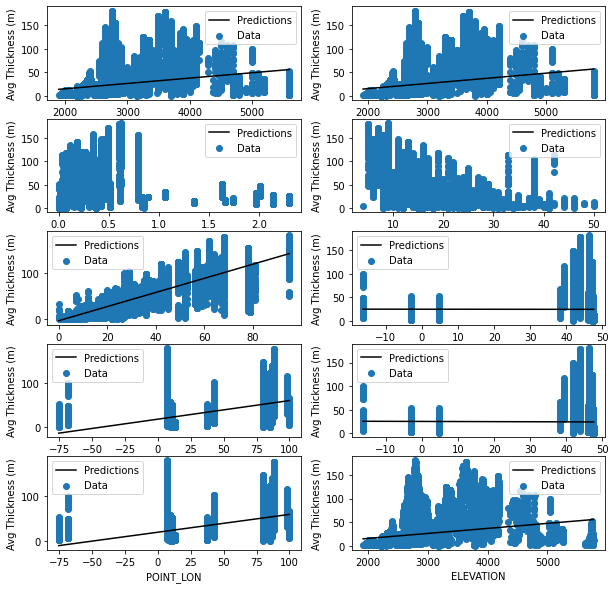

In [10]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = linear_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

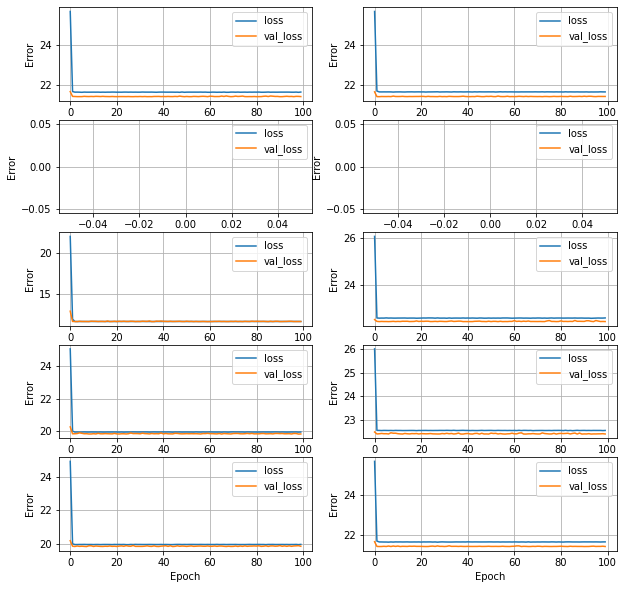

In [11]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    plot_loss(linear_history[variable_name])

In [12]:
%%time
linear_model = build_linear_model(normalizer['ALL'])

history = linear_model.fit(
train_features, train_labels,        
   epochs=100,
#    verbose=0,
   validation_split = 0.2)

test_results["MULTI"] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

Epoch 1/100
392/392 [==============================] - 0s 720us/step - loss: nan - val_loss: nan
Epoch 2/100
392/392 [==============================] - 0s 612us/step - loss: nan - val_loss: nan
Epoch 3/100
392/392 [==============================] - 0s 601us/step - loss: nan - val_loss: nan
Epoch 4/100
392/392 [==============================] - 0s 589us/step - loss: nan - val_loss: nan
Epoch 5/100
392/392 [==============================] - 0s 521us/step - loss: nan - val_loss: nan
Epoch 6/100
392/392 [==============================] - 0s 502us/step - loss: nan - val_loss: nan
Epoch 7/100
392/392 [==============================] - 0s 508us/step - loss: nan - val_loss: nan
Epoch 8/100
392/392 [==============================] - 0s 502us/step - loss: nan - val_loss: nan
Epoch 9/100
392/392 [==============================] - 0s 503us/step - loss: nan - val_loss: nan
Epoch 10/100
392/392 [==============================] - 0s 517us/step - loss: nan - val_loss: nan
Epoch 11/100
392/392 [=======

{'MULTI': nan}

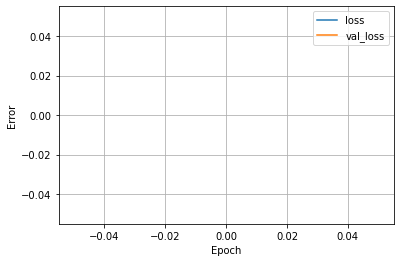

In [13]:
plot_loss(history)

In [14]:
def build_dnn_model(norm):
    model = keras.Sequential([
              norm,
              layers.Dense(64, activation='relu'),
              layers.Dense(64, activation='relu'),
              layers.Dense(1) ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
    
    return model

def dnn_test_results(feature_name):
    dnn_test_results[feature_name] = dnn_model.evaluate(
        test_features[feature_name],
        test_labels, verbose=0)

In [15]:
test_results = {}
dnn_model = {}
dnn_history = {}
dnn_results = {}

In [16]:
%%time
variable_list = ("LOWER_BOUND", "UPPER_BOUND", "AREA", "MEAN_SLOPE","MEAN_THICKNESS","LAT","LON","POINT_LAT","POINT_LON","ELEVATION")
for variable_name in variable_list:

    dnn_model[variable_name] = build_dnn_model(normalizer[variable_name])
    dnn_history[variable_name] = dnn_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
#                                         verbose=0,
                                        validation_split = 0.2)
    dnn_results[variable_name] = dnn_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

dnn_results

Epoch 1/100
392/392 [==============================] - 1s 1ms/step - loss: 21.0997 - val_loss: 19.4968
Epoch 2/100
392/392 [==============================] - 0s 997us/step - loss: 19.0253 - val_loss: 19.1199
Epoch 3/100
392/392 [==============================] - 0s 1ms/step - loss: 18.8170 - val_loss: 18.5560
Epoch 4/100
392/392 [==============================] - 0s 1ms/step - loss: 18.8365 - val_loss: 18.6716
Epoch 5/100
392/392 [==============================] - 0s 999us/step - loss: 18.7531 - val_loss: 18.7690
Epoch 6/100
392/392 [==============================] - 0s 1ms/step - loss: 18.7108 - val_loss: 18.9882
Epoch 7/100
392/392 [==============================] - 0s 1ms/step - loss: 18.6364 - val_loss: 18.4085
Epoch 8/100
392/392 [==============================] - 0s 1ms/step - loss: 18.5063 - val_loss: 18.3670
Epoch 9/100
392/392 [==============================] - 0s 1ms/step - loss: 18.4971 - val_loss: 18.3739
Epoch 10/100
392/392 [==============================] - 0s 1ms/step -

392/392 [==============================] - 0s 990us/step - loss: 17.3587 - val_loss: 17.4375
Epoch 58/100
392/392 [==============================] - 0s 1ms/step - loss: 17.3662 - val_loss: 17.5780
Epoch 59/100
392/392 [==============================] - 0s 1ms/step - loss: 17.3692 - val_loss: 17.4343
Epoch 60/100
392/392 [==============================] - 0s 978us/step - loss: 17.3957 - val_loss: 17.6869
Epoch 61/100
392/392 [==============================] - 0s 985us/step - loss: 17.3495 - val_loss: 17.5531
Epoch 62/100
392/392 [==============================] - 0s 987us/step - loss: 17.4037 - val_loss: 17.3933
Epoch 63/100
392/392 [==============================] - 0s 991us/step - loss: 17.3605 - val_loss: 17.5135
Epoch 64/100
392/392 [==============================] - 0s 1ms/step - loss: 17.3307 - val_loss: 17.5009
Epoch 65/100
392/392 [==============================] - 0s 1ms/step - loss: 17.3553 - val_loss: 17.3446
Epoch 66/100
392/392 [==============================] - 0s 999us/st

392/392 [==============================] - 0s 996us/step - loss: nan - val_loss: nan
Epoch 22/100
392/392 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 23/100
392/392 [==============================] - 0s 990us/step - loss: nan - val_loss: nan
Epoch 24/100
392/392 [==============================] - 0s 984us/step - loss: nan - val_loss: nan
Epoch 25/100
392/392 [==============================] - 0s 980us/step - loss: nan - val_loss: nan
Epoch 26/100
392/392 [==============================] - 0s 983us/step - loss: nan - val_loss: nan
Epoch 27/100
392/392 [==============================] - 0s 995us/step - loss: nan - val_loss: nan
Epoch 28/100
392/392 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 29/100
392/392 [==============================] - 0s 983us/step - loss: nan - val_loss: nan
Epoch 30/100
392/392 [==============================] - 0s 995us/step - loss: nan - val_loss: nan
Epoch 31/100
392/392 [===============

Epoch 5/100
392/392 [==============================] - 0s 1ms/step - loss: 11.3041 - val_loss: 11.2289
Epoch 6/100
392/392 [==============================] - 0s 975us/step - loss: 11.2335 - val_loss: 11.4012
Epoch 7/100
392/392 [==============================] - 0s 1ms/step - loss: 11.2538 - val_loss: 11.1756
Epoch 8/100
392/392 [==============================] - 0s 1ms/step - loss: 11.3418 - val_loss: 11.1474
Epoch 9/100
392/392 [==============================] - 0s 1ms/step - loss: 11.2269 - val_loss: 11.2227
Epoch 10/100
392/392 [==============================] - 0s 1ms/step - loss: 11.2434 - val_loss: 11.0948
Epoch 11/100
392/392 [==============================] - 0s 974us/step - loss: 11.2363 - val_loss: 11.1201
Epoch 12/100
392/392 [==============================] - 0s 996us/step - loss: 11.2451 - val_loss: 11.1156
Epoch 13/100
392/392 [==============================] - 0s 991us/step - loss: 11.1987 - val_loss: 11.1899
Epoch 14/100
392/392 [==============================] - 0s 1m

392/392 [==============================] - 0s 1ms/step - loss: 10.9638 - val_loss: 10.8139
Epoch 84/100
392/392 [==============================] - 0s 1ms/step - loss: 10.9724 - val_loss: 10.8180
Epoch 85/100
392/392 [==============================] - 0s 1ms/step - loss: 10.9185 - val_loss: 10.7600
Epoch 86/100
392/392 [==============================] - 0s 985us/step - loss: 10.9250 - val_loss: 10.8578
Epoch 87/100
392/392 [==============================] - 0s 1ms/step - loss: 10.9275 - val_loss: 10.7557
Epoch 88/100
392/392 [==============================] - 0s 1ms/step - loss: 10.9693 - val_loss: 10.8067
Epoch 89/100
392/392 [==============================] - 0s 1ms/step - loss: 10.9610 - val_loss: 10.7293
Epoch 90/100
392/392 [==============================] - 0s 1ms/step - loss: 10.9289 - val_loss: 10.8097
Epoch 91/100
392/392 [==============================] - 0s 1ms/step - loss: 10.9503 - val_loss: 10.8919
Epoch 92/100
392/392 [==============================] - 0s 1ms/step - loss:

Epoch 39/100
392/392 [==============================] - 0s 990us/step - loss: 18.0429 - val_loss: 17.7241
Epoch 40/100
392/392 [==============================] - 0s 1ms/step - loss: 18.0680 - val_loss: 17.7391
Epoch 41/100
392/392 [==============================] - 0s 967us/step - loss: 18.0434 - val_loss: 17.6101
Epoch 42/100
392/392 [==============================] - 0s 982us/step - loss: 18.0482 - val_loss: 17.5960
Epoch 43/100
392/392 [==============================] - 0s 992us/step - loss: 18.0296 - val_loss: 17.6751
Epoch 44/100
392/392 [==============================] - 0s 951us/step - loss: 18.0522 - val_loss: 17.9757
Epoch 45/100
392/392 [==============================] - 0s 950us/step - loss: 18.0321 - val_loss: 17.7318
Epoch 46/100
392/392 [==============================] - 0s 961us/step - loss: 18.0442 - val_loss: 17.6925
Epoch 47/100
392/392 [==============================] - 0s 998us/step - loss: 18.0291 - val_loss: 17.5736
Epoch 48/100
392/392 [==========================

Epoch 94/100
392/392 [==============================] - 0s 997us/step - loss: 17.3705 - val_loss: 17.1693
Epoch 95/100
392/392 [==============================] - 0s 1ms/step - loss: 17.3639 - val_loss: 17.2198
Epoch 96/100
392/392 [==============================] - 0s 1000us/step - loss: 17.3371 - val_loss: 17.2246
Epoch 97/100
392/392 [==============================] - 0s 1ms/step - loss: 17.3280 - val_loss: 17.1170
Epoch 98/100
392/392 [==============================] - 0s 966us/step - loss: 17.3159 - val_loss: 17.2156
Epoch 99/100
392/392 [==============================] - 0s 973us/step - loss: 17.2973 - val_loss: 17.4106
Epoch 100/100
392/392 [==============================] - 0s 1ms/step - loss: 17.2849 - val_loss: 17.2332
Epoch 1/100
392/392 [==============================] - 1s 1ms/step - loss: 18.9351 - val_loss: 17.8102
Epoch 2/100
392/392 [==============================] - 0s 985us/step - loss: 18.2406 - val_loss: 17.6642
Epoch 3/100
392/392 [==============================] -

Epoch 72/100
392/392 [==============================] - 0s 1ms/step - loss: 18.0507 - val_loss: 17.5512
Epoch 73/100
392/392 [==============================] - 0s 1ms/step - loss: 17.9936 - val_loss: 17.6142
Epoch 74/100
392/392 [==============================] - 0s 1ms/step - loss: 18.0407 - val_loss: 17.5488
Epoch 75/100
392/392 [==============================] - 0s 1ms/step - loss: 18.0431 - val_loss: 17.5995
Epoch 76/100
392/392 [==============================] - 0s 1ms/step - loss: 18.0100 - val_loss: 17.6472
Epoch 77/100
392/392 [==============================] - 0s 997us/step - loss: 18.0179 - val_loss: 17.6939
Epoch 78/100
392/392 [==============================] - 0s 977us/step - loss: 18.0230 - val_loss: 17.5561
Epoch 79/100
392/392 [==============================] - 0s 956us/step - loss: 18.0201 - val_loss: 17.5872
Epoch 80/100
392/392 [==============================] - 0s 979us/step - loss: 18.0204 - val_loss: 17.7514
Epoch 81/100
392/392 [==============================] - 

Epoch 50/100
392/392 [==============================] - 0s 1ms/step - loss: 17.2307 - val_loss: 17.2842
Epoch 51/100
392/392 [==============================] - 0s 985us/step - loss: 17.2292 - val_loss: 17.2167
Epoch 52/100
392/392 [==============================] - 0s 1ms/step - loss: 17.2413 - val_loss: 17.5981
Epoch 53/100
392/392 [==============================] - 0s 1ms/step - loss: 17.2238 - val_loss: 17.1916
Epoch 54/100
392/392 [==============================] - 0s 1ms/step - loss: 17.1969 - val_loss: 17.6978
Epoch 55/100
392/392 [==============================] - 0s 1ms/step - loss: 17.2345 - val_loss: 17.5475
Epoch 56/100
392/392 [==============================] - 0s 965us/step - loss: 17.1727 - val_loss: 17.2523
Epoch 57/100
392/392 [==============================] - 0s 1ms/step - loss: 17.1308 - val_loss: 17.0663
Epoch 58/100
392/392 [==============================] - 0s 968us/step - loss: 17.1239 - val_loss: 17.0454
Epoch 59/100
392/392 [==============================] - 0s

{'LOWER_BOUND': 16.661489486694336,
 'UPPER_BOUND': 16.937480926513672,
 'AREA': nan,
 'MEAN_SLOPE': nan,
 'MEAN_THICKNESS': 10.717184066772461,
 'LAT': 16.866121292114258,
 'LON': 17.64046859741211,
 'POINT_LAT': 16.956926345825195,
 'POINT_LON': 17.727933883666992,
 'ELEVATION': 16.37208366394043}

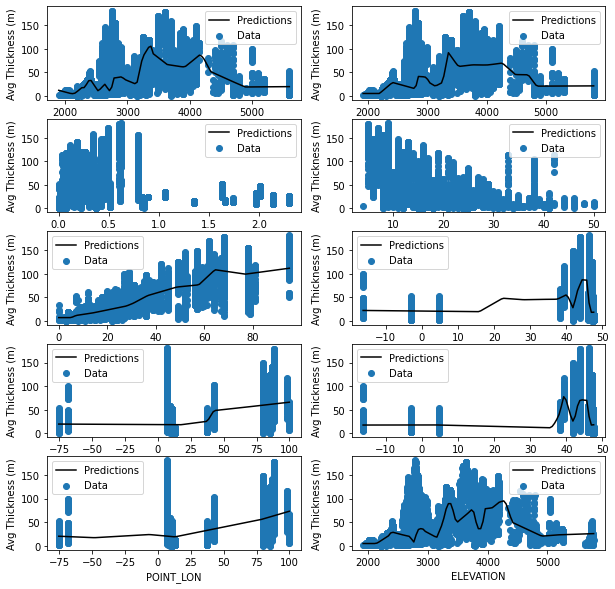

In [17]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = dnn_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

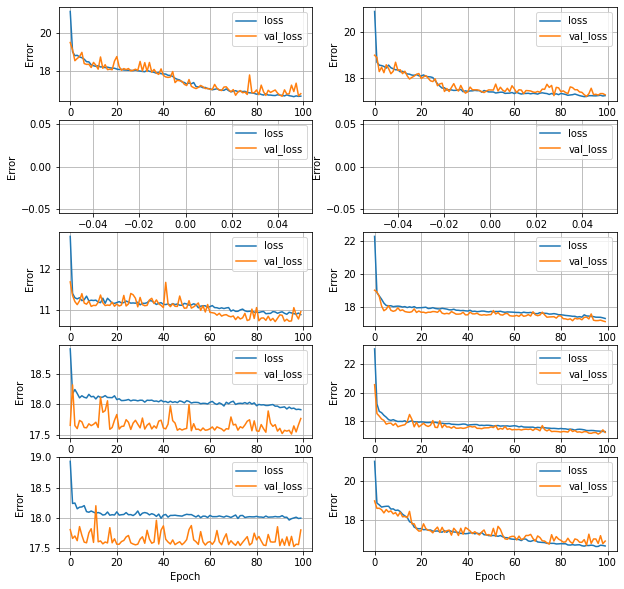

In [18]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    plot_loss(dnn_history[variable_name])

In [19]:
dnn_full_model = build_dnn_model(normalizer['ALL'])

In [20]:
%%time
history_full = dnn_full_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 5min 47s, sys: 1min 24s, total: 7min 11s
Wall time: 33.3 s


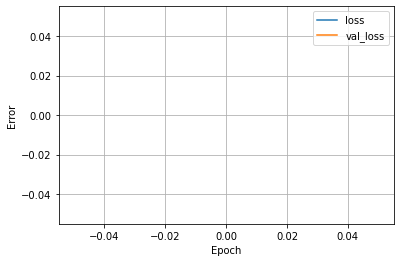

In [21]:
plot_loss(history_full)

In [22]:
test_results["dnn_full_model"] = dnn_full_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

{'dnn_full_model': nan}

Text(0, 0.5, 'Model Thickness(m)')

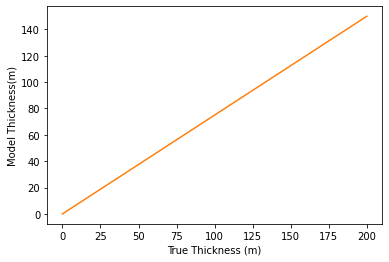

In [23]:
y = dnn_full_model.predict(test_features)
plt.plot(test_labels,y,'o')
plt.plot((0,200),(0,150),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness(m)')

/home/sa42/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/sa42/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

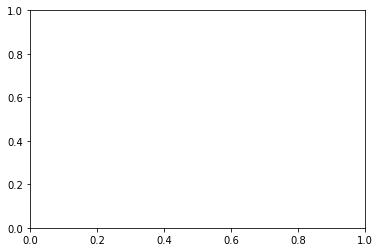

In [24]:
plt.subplots()
x = np.reshape(test_labels.values, (-1, 1)) # Training values in a n-by-1 array
pct_error = (x-y)/x
plt.hist(pct_error.flatten())
plt.xlabel('Percent Error')
plt.ylabel('Count')